# Statistical Disclosure Attack

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import Lasso, LinearRegression, Ridge

from src import attack, evaluation, plotting, utils
from src.dataset import Dataset, chating, simulation
from src.experiment import run_experiments

In [2]:
# Define the dimensions of the problem
# N: number of senders (senders/receivers)
# K: number of contacts per sender
# M: number of observations
# B: batch size (number of observations per batch)
N = 100
K = 5
M = 1000
B = 10

seed = 42

## Lineare Gleichungsystem

### Simulated Data

In [3]:
sim_data = simulation.get_dataset(N, B, M, K, seed, gen_messages=simulation.gen_messages_normal, gen_sender_behavior_params={'exact_contacts': False})
P_true, X, Y = sim_data

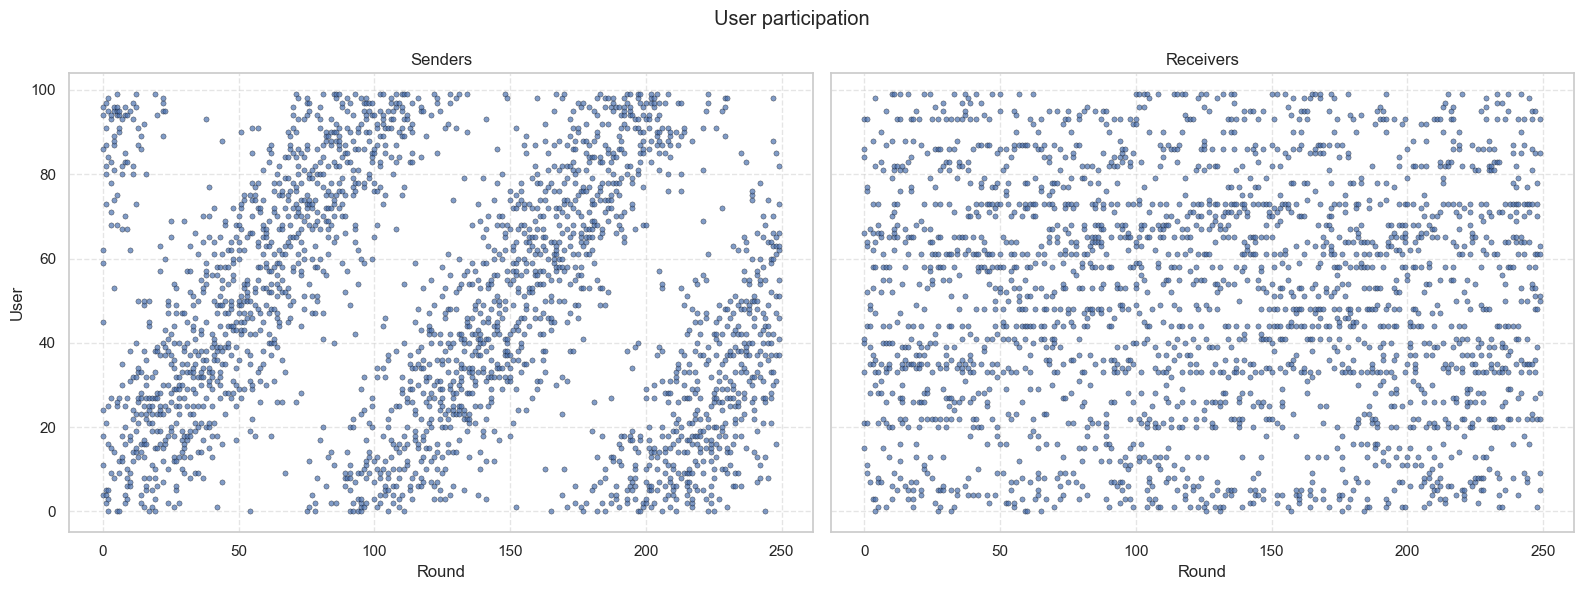

In [4]:
n_rounds = 250
fig, axs = plotting.plot_user_participation(X[:n_rounds], Y[:n_rounds])
plt.savefig('assets/simulated/user_participation.pdf')
plt.show()

In [ ]:
torch_params = {'batch_size': 64, 'epochs': 200, 'lr': 1e-4, 'early_stop': 5}
attacks = [attack.Sda(), attack.SdaSn(),
           attack.LinearRegressionAttack(LinearRegression()),
           attack.LinearRegressionAttack(Ridge(alpha=1.0)),
           attack.LinearRegressionAttack(Lasso(positive=True)),
           attack.TorchAttack(attack.Transformer(
               num_users=(P_true.shape[0], P_true.shape[1])
               ), train_params=torch_params)
]

results = run_experiments(sim_data, attacks)
results.round(3)

/Users/wim50594/Nextcloud/Wissenschaftl. Assistent/Forschung/Mix/SDA/.venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
100%|██████████| 100/100 [00:27<00:00,  3.70epoch/s]


,observations,attack,runtime(s),%contacts,mae,rbo,spearman,cosine
0,1000,Lasso(positive=True),0.219,0.024,48.190,0.016,0.000,0.000
1,1000,LinearRegression(),0.021,0.922,2.257,0.913,0.260,0.935
2,1000,Ridge(),0.004,0.922,2.236,0.914,0.260,0.935
3,1000,Sda,0.013,0.691,5.324,0.752,0.239,0.659
4,1000,SdaSn,0.661,0.882,2.437,0.896,0.259,0.869
5,1000,"Transformer(batch_size=64, epochs=100, lr=0.00...",28.705,0.919,2.465,0.900,0.259,0.987


In [ ]:
# Model parameters
torch_params = {'batch_size': 64, 'epochs': 100, 'lr': 1e-4, 'early_stop': 5, 'use_tqdm': False}
attacks = [attack.Sda(), attack.SdaSn(),
           attack.LinearRegressionAttack(Ridge(alpha=1.0)),
           attack.TorchAttack(attack.Transformer(
               num_users=(P_true.shape[0], P_true.shape[1])
               ), train_params=torch_params)
]

results = run_experiments(sim_data, attacks, step=100, repeat=5)
fig, axes = plotting.plot_evaluation_results(results)
plt.savefig('assets/simulated/evaluation.pdf')
plt.show()

Observation Rounds:  70%|███████   | 7/10 [07:08<03:53, 77.77s/round]

### Real Instant Messaging Data

In [ ]:
real_data = chating.get_dataset('data/instant-messaging-data.pkl', most_active_months=6, n_user=N, k_contacts=K, batch_size=B, seed=seed)
P_true, X, Y = real_data

In [ ]:
n_rounds = 250
fig, axs = plotting.plot_user_participation(X[:n_rounds], Y[:n_rounds])
plt.savefig('assets/real/user_participation.pdf')
plt.show()

In [ ]:
torch_params = {'batch_size': 64, 'epochs': 200, 'lr': 1e-4, 'early_stop': 5}
attacks = [attack.Sda(), attack.SdaSn(),
           attack.LinearRegressionAttack(LinearRegression()),
           attack.LinearRegressionAttack(Ridge(alpha=1.0)),
           attack.LinearRegressionAttack(Lasso(positive=True)),
           attack.TorchAttack(attack.Transformer(
               num_users=(P_true.shape[0], P_true.shape[1])
               ), train_params=torch_params)
]

results = run_experiments(sim_data, attacks)
results.round(3)

In [ ]:
# Model parameters
torch_params = {'batch_size': 64, 'epochs': 100, 'lr': 1e-4, 'early_stop': 5, 'use_tqdm': False}
attacks = [attack.Sda(), attack.SdaSn(),
           attack.LinearRegressionAttack(Ridge(alpha=1.0)),
           attack.TorchAttack(attack.Transformer(
               num_users=(P_true.shape[0], P_true.shape[1])
               ), train_params=torch_params)
]

results = run_experiments(sim_data, attacks, step=100, repeat=5)
fig, axes = plotting.plot_evaluation_results(results)
plt.savefig('assets/real/evaluation.pdf')
plt.show()